In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
import operator
import os
from pathlib import Path
cwd = os.getcwd() # get path of current working directory
main_folder = str(Path(cwd).parents[0]) # main folder is the lowest level in project

In [2]:
cex84_02 = pd.read_stata(main_folder + "\data\cex84_02.dta")
cex84_02['ee'] = 0
cex84_02.loc[(cex84_02['year'] <=95) & (cex84_02['educatio'] >=21), 'ee'] = 1
cex84_02.loc[(cex84_02['year'] >=96) & (cex84_02['educatio'] >=40), 'ee'] = 1
cex84_02['meanee'] = cex84_02['ee'].mean()

#Summary statistics
cex84_02[["meanee"]].describe()

,meanee
count,1.300220e+05
mean,5.144360e-01
std,8.832968e-13
min,5.144360e-01
25%,5.144360e-01
50%,5.144360e-01
75%,5.144360e-01
max,5.144360e-01


In [3]:
#Official total expenditure
cex84_02['totalexp1'] = cex84_02.loc[:, 'foodhome':'charity'].sum(axis=1)
cex84_02['totalexp'] = cex84_02['totalexp1'] + cex84_02['ohint'] + cex84_02['ohtax'] + cex84_02['ohmaint']
cex84_02 = cex84_02.drop(columns=['totalexp1'])
#cex84_02

In [4]:
#Expenditure used in this paper
cex84_02 = cex84_02.drop(columns=['autos'])
cex84_02['tt'] = cex84_02.loc[:, 'foodhome':'charity'].sum(axis=1)
cex84_02 = cex84_02[cex84_02.tt >= 0]
cex84_02['ltotexp'] = np.log(cex84_02['tt']) - np.log(cex84_02['cpi_97'])
#cex84_02

C:\Users\gimat\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
#all steps as in the table3_panelA.ipynb, thus use already derived file
cex84_02_div = pd.read_stata('cex84_02_divB.dta')
cex84_02_div = cex84_02_div.drop(columns=['gambling', 'toiletry', 'housuppl'])
#cex84_02_div

In [6]:
#Aggregate some small expenses with similar expenses
cex84_02_div['foodout'] = cex84_02_div['foodout'] + cex84_02_div['foodwork'] 
cex84_02_div['renthome'] = cex84_02_div['renthome'] + cex84_02_div['rentothr']
cex84_02_div['pubs'] = cex84_02_div['pubs'] + cex84_02_div['books']
cex84_02_div['hospital'] = cex84_02_div['hospital'] + cex84_02_div['nurshome']
cex84_02_div['masstran'] = cex84_02_div['masstran'] + cex84_02_div['tolls']
cex84_02_div = cex84_02_div.drop(columns=['foodwork', 'rentothr', 'books', 'nurshome', 'tolls'])

cex84_02_div['sex'] = cex84_02_div['sex'] - 1
#cex84_02_div

In [7]:
cex84_02_div.to_stata("temp1")

In [8]:
cex84_02_div.loc[cex84_02_div['year'] <=89, 'decade'] = 80
cex84_02_div.loc[(cex84_02_div['year'] >=90) & (cex84_02_div['educatio'] <=96), 'decade'] = 90
cex84_02_div.loc[(cex84_02_div['year'] >=97) & (cex84_02_div['educatio'] <=102), 'decade'] = 100

In [9]:
cex84_02_div.rename(columns={'foodhome':'share1', 'foodout':'share2', 'tobacco':'share3', 'alcohol':'share4', 
                             'niteclub':'share5', 'clothes':'share6','tailors':'share7', 'jewelry':'share8', 
                             'hlthbeau':'share9', 'renthome':'share10', 'furnish':'share11', 'elect':'share12', 
                             'gas':'share13','water':'share14', 'homefuel':'share15','telephon':'share16', 
                             'servants':'share17', 'drugs':'share18', 'orthopd':'share19', 'doctors':'share20', 
                             'hospital':'share21', 'helthins':'share22', 'busiserv':'share23', 'lifeins':'share24',
                             'parts':'share25','carservs':'share26', 'gasoline':'share27', 'autoins':'share28', 
                             'masstran':'share29', 'othtrans':'share30', 'airfare':'share31', 'pubs':'share32', 
                             'recsport':'share33', 'othrec':'share34', 'highedu':'share35','lowedu':'share36', 
                             'othedu':'share37', 'charity':'share38'}, inplace=True)

In [10]:
cex84_02_div = cex84_02_div[['share1', 'share2', 'share3', 'share4', 'share5', 'share6', 'share7', 'share8', 'share9',
                               'share10', 'share11', 'share12', 'share13', 'share14', 'share15', 'share16', 'share17', 
                               'share18', 'share19', 'share20', 'share21', 'share22', 'share23', 'share24', 'share25',
                               'share26', 'share27', 'share28', 'share29', 'share30', 'share31', 'share32', 'share33', 
                               'share34', 'share35', 'share36', 'share37', 'share38', 'decade', 'meanee']]
cex84_02_div['id'] = np.arange(1, len(cex84_02_div)+1)
#cex84_02_div


In [11]:
wl_cex84_02_div = pd.wide_to_long(cex84_02_div, ["share"], i='id', j="ind")
wl_cex84_02_div = wl_cex84_02_div.sort_values(by=['id','ind'])
#wl_cex84_02_div

In [12]:
#create shares
shares_wl_cex84_02_div = wl_cex84_02_div.groupby(['ind','decade'])['share', 'meanee'].mean().sort_values(by=['ind','decade'])
shares_wl_cex84_02_div = shares_wl_cex84_02_div.reset_index(["decade"])
#shares_wl_cex84_02_div

<ipython-input-12-2cab2d3e0f49>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shares_wl_cex84_02_div = wl_cex84_02_div.groupby(['ind','decade'])['share', 'meanee'].mean().sort_values(by=['ind','decade'])


In [13]:
shares_wl_cex84_02_div.to_stata("shares3B")

In [14]:
shares80 = shares_wl_cex84_02_div[shares_wl_cex84_02_div.decade == 80]
shares80.to_stata("shares80")
shares90 = shares_wl_cex84_02_div[shares_wl_cex84_02_div.decade == 90]
shares90.to_stata("shares90")
shares100 = shares_wl_cex84_02_div[shares_wl_cex84_02_div.decade == 100]
shares100.to_stata("shares100")

In [15]:
temp1 = pd.read_stata('temp1')

In [16]:
sample80 = temp1[temp1.year <= 89]
sample80.to_stata("sample80")
sample90 = temp1.loc[(temp1['year'] >=90) & (temp1['year'] <=96)]
sample90.to_stata("sample90")
sample100 = temp1.loc[(temp1['year'] >=97) & (temp1['year'] <=102)]
sample100.to_stata("sample100")

In [17]:
#1
shares_reg = pd.read_stata('shares_reg1B.dta')
shares_reg['id'] = np.arange(1, len(shares_reg)+1)
shares_reg_long = pd.wide_to_long(shares_reg,["bdum", "gdum", "sbdum", "sgdum"], i='id', j="ind")

shares_joint = pd.merge(shares_reg_long, shares100, on='ind')
shares_joint.rename(columns={'bdum':'incomebeta','sbdum':'sigmaincome', 'gdum':'educbeta', 'sgdum':'sigmaedu', 
                             'share':'meansh'}, inplace=True)
#shares_joint

#Summary statistics
shares_joint[['incomebeta','sigmaincome','educbeta','sigmaedu']].describe()

,incomebeta,sigmaincome,educbeta,sigmaedu
count,3.800000e+01,38.000000,38.000000,38.000000
mean,8.577971e-11,0.000217,0.000000,0.000307
std,1.016493e-02,0.000166,0.011311,0.000239
min,-4.771940e-02,0.000055,-0.047786,0.000095
25%,-7.593222e-04,0.000114,-0.001410,0.000140
50%,1.066381e-03,0.000193,0.001127,0.000280
75%,5.031831e-03,0.000273,0.006615,0.000371
max,1.192127e-02,0.000931,0.013772,0.001417


In [18]:
shares_joint['elastincome'] = (shares_joint['incomebeta']/shares_joint['meansh'])+1
shares_joint['elastedu'] = (shares_joint['educbeta']*shares_joint['meanee'])/shares_joint['meansh']

shares_joint = shares_joint[['elastedu', 'elastincome', 'meansh']]
shares_joint.rename(columns={'elastedu':'elastedu100', 'elastincome':'elastincome100', 'meansh':'meansh100'}, inplace=True)

In [19]:
shares_joint.to_stata("elast100")

In [20]:
#2
shares_reg = pd.read_stata('shares_reg2B.dta')
shares_reg['id'] = np.arange(1, len(shares_reg)+1)
shares_reg_long = pd.wide_to_long(shares_reg,["bdum", "gdum", "sbdum", "sgdum"], i='id', j="ind")

shares_joint = pd.merge(shares_reg_long, shares80, on='ind')
shares_joint.rename(columns={'bdum':'incomebeta','sbdum':'sigmaincome', 'gdum':'educbeta', 'sgdum':'sigmaedu', 'share':'meansh'}, inplace=True)
#shares_joint

shares_joint['elastincome'] = (shares_joint['incomebeta']/shares_joint['meansh'])+1
shares_joint['elastedu'] = (shares_joint['educbeta']*shares_joint['meanee'])/shares_joint['meansh']

shares_joint = shares_joint[[ 'elastedu', 'elastincome', 'meansh']]
shares_joint.rename(columns={'elastedu':'elastedu80', 'elastincome':'elastincome80', 'meansh':'meansh80'}, inplace=True)
#shares_joint

In [21]:
shares_joint.to_stata("elast80")

In [22]:
#3
shares_reg = pd.read_stata('shares_reg3B.dta')
shares_reg['id'] = np.arange(1, len(shares_reg)+1)
shares_reg_long = pd.wide_to_long(shares_reg,["bdum", "gdum", "sbdum", "sgdum"], i='id', j="ind")

shares_joint = pd.merge(shares_reg_long, shares90, on='ind')
shares_joint.rename(columns={'bdum':'incomebeta','sbdum':'sigmaincome', 'gdum':'educbeta', 'sgdum':'sigmaedu', 'share':'meansh'}, inplace=True)
#shares_joint

shares_joint['elastincome'] = (shares_joint['incomebeta']/shares_joint['meansh'])+1
shares_joint['elastedu'] = (shares_joint['educbeta']*shares_joint['meanee'])/shares_joint['meansh']

shares_joint = shares_joint[[ 'elastedu', 'elastincome', 'meansh']]
shares_joint.rename(columns={'elastedu':'elastedu90', 'elastincome':'elastincome90', 'meansh':'meansh90'}, inplace=True)
#shares_joint

In [23]:
shares_joint.to_stata("elast90")

In [24]:
#merging
elast90 = pd.read_stata("elast90")
elast100 = pd.read_stata("elast100")
elast80 = pd.read_stata("elast80")
elast90100 = pd.merge(elast90, elast100, on='ind')
elast_merged = pd.merge(elast90100, elast80, on='ind')
#elast_merged

In [25]:
elast_merged['sic'] = np.nan

elast_merged.loc[elast_merged['ind'] == 1, 'sic'] = 17 
elast_merged.loc[elast_merged['ind'] == 2, 'sic'] = 121 
elast_merged.loc[elast_merged['ind'] == 3, 'sic'] = 19
elast_merged.loc[elast_merged['ind'] == 4, 'sic'] = 18 
elast_merged.loc[elast_merged['ind'] == 5, 'sic'] = 121 
elast_merged.loc[elast_merged['ind'] == 6, 'sic'] = 22
elast_merged.loc[elast_merged['ind'] == 7, 'sic'] = 124 
elast_merged.loc[elast_merged['ind'] == 8, 'sic'] = 45
elast_merged.loc[elast_merged['ind'] == 9, 'sic'] = 124 
elast_merged.loc[elast_merged['ind'] == 10, 'sic'] = 14 

elast_merged.loc[elast_merged['ind'] == 11, 'sic'] = 67 
elast_merged.loc[elast_merged['ind'] == 12, 'sic'] = 11 
elast_merged.loc[elast_merged['ind'] == 13, 'sic'] = 12
elast_merged.loc[elast_merged['ind'] == 14, 'sic'] = 13 
elast_merged.loc[elast_merged['ind'] == 15, 'sic'] = 6 
elast_merged.loc[elast_merged['ind'] == 16, 'sic'] = 86
elast_merged.loc[elast_merged['ind'] == 17, 'sic'] = 124 
elast_merged.loc[elast_merged['ind'] == 18, 'sic'] = 32
elast_merged.loc[elast_merged['ind'] == 19, 'sic'] = 68 
elast_merged.loc[elast_merged['ind'] == 20, 'sic'] = 116 

elast_merged.loc[elast_merged['ind'] == 21, 'sic'] = 115 
elast_merged.loc[elast_merged['ind'] == 22, 'sic'] = 91 
elast_merged.loc[elast_merged['ind'] == 23, 'sic'] = 104
elast_merged.loc[elast_merged['ind'] == 24, 'sic'] = 92
elast_merged.loc[elast_merged['ind'] == 25, 'sic'] = 64
elast_merged.loc[elast_merged['ind'] == 26, 'sic'] = 122
elast_merged.loc[elast_merged['ind'] == 27, 'sic'] = 6 
elast_merged.loc[elast_merged['ind'] == 28, 'sic'] = 95
elast_merged.loc[elast_merged['ind'] == 29, 'sic'] = 76 
elast_merged.loc[elast_merged['ind'] == 30, 'sic'] = 73 

elast_merged.loc[elast_merged['ind'] == 31, 'sic'] = 72
elast_merged.loc[elast_merged['ind'] == 32, 'sic'] = 81 
elast_merged.loc[elast_merged['ind'] == 33, 'sic'] = 118
elast_merged.loc[elast_merged['ind'] == 34, 'sic'] = 119
elast_merged.loc[elast_merged['ind'] == 35, 'sic'] = 113 
elast_merged.loc[elast_merged['ind'] == 36, 'sic'] = 113
elast_merged.loc[elast_merged['ind'] == 37, 'sic'] = 113 
elast_merged.loc[elast_merged['ind'] == 38, 'sic'] = 126


In [26]:
skilloecdUS = pd.read_stata('skilloecdUS')
elast_merged_new = pd.merge(elast_merged, skilloecdUS, on='sic')
#elast_merged_new

In [27]:
elast_merged_new['skiloecd2'] = elast_merged_new['skiloecd'] **2
#elast_merged_new

In [28]:
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [29]:
#1st regression function and results
Y = elast_merged_new["elastedu80"]
X = elast_merged_new["skiloecd"]
w = elast_merged_new["meansh80"]
X = sm.add_constant(X)
model = sm.WLS(Y,X,w)
results3 = model.fit()
print(results3.summary())

#2nd regression function and results
X = elast_merged_new[["skiloecd2","skiloecd"]] 
y = elast_merged_new["elastedu80"]
w = elast_merged_new["meansh80"]
## fit a WLS model 
X = sm.add_constant(X)
est = sm.WLS(y, X, w).fit()
print(est.summary())

#3rd regression function and results
Y = elast_merged_new["elastedu90"]
X = elast_merged_new["skiloecd"]
w = elast_merged_new["meansh90"]
X = sm.add_constant(X)
model = sm.WLS(Y,X,w)
results3 = model.fit()
print(results3.summary())

#4th regression function and results
X = elast_merged_new[["skiloecd","skiloecd2"]] 
y = elast_merged_new["elastedu90"]
w = elast_merged_new["meansh90"]
## fit a WLS model 
X = sm.add_constant(X)
est = sm.WLS(y, X, w).fit()
print(est.summary())

#5th regression function and results
Y = elast_merged_new["elastedu100"]
X = elast_merged_new["skiloecd"]
w = elast_merged_new["meansh100"]
X = sm.add_constant(X)
model = sm.WLS(Y,X,w)
results3 = model.fit()
print(results3.summary()) 

#6th regression function and results
X = elast_merged_new[["skiloecd","skiloecd2"]] 
y = elast_merged_new["elastedu100"]
w = elast_merged_new["meansh100"]
## fit a WLS model 
X = sm.add_constant(X)
est = sm.WLS(y, X, w).fit()
print(est.summary())

                            WLS Regression Results                            
Dep. Variable:             elastedu80   R-squared:                       0.059
Model:                            WLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.264
Date:                Tue, 23 Mar 2021   Prob (F-statistic):              0.141
Time:                        12:43:43   Log-Likelihood:                 9.0528
No. Observations:                  38   AIC:                            -14.11
Df Residuals:                      36   BIC:                            -10.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1495      0.102     -1.461      0.1

In [30]:
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

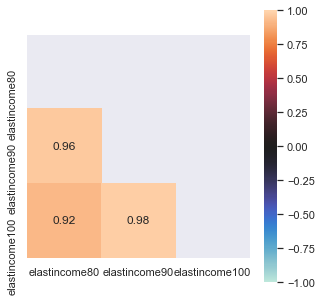

In [31]:
#Correlation1
corr1 = pd.DataFrame(elast_merged,columns=['elastincome80', 'elastincome90', 'elastincome100'])
corrMatrix1 = corr1.corr()

mask = np.zeros_like(corrMatrix1)
mask[np.triu_indices_from(mask)] = True
fig_heatmap, axs = plt.subplots(figsize=(5, 5))
axs = sns.heatmap(
    corrMatrix1, annot=True, fmt=".2f", vmin=-1, vmax=1, mask=mask, square=True, center=0
)
plt.show()

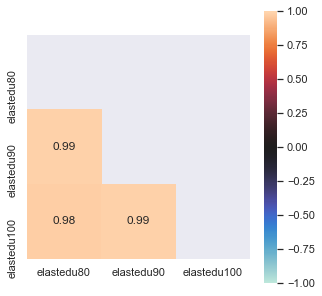

In [32]:
#Correlation2
corr2 = pd.DataFrame(elast_merged,columns=['elastedu80', 'elastedu90', 'elastedu100'])
corrMatrix2 = corr2.corr()

mask = np.zeros_like(corrMatrix2)
mask[np.triu_indices_from(mask)] = True
fig_heatmap, axs = plt.subplots(figsize=(5, 5))
axs = sns.heatmap(
    corrMatrix2, annot=True, fmt=".2f", vmin=-1, vmax=1, mask=mask, square=True, center=0
)
plt.show()

In [33]:
#TABLE3 PANELB

In [34]:
skilloecd = [0.396,-5.028,0.488,-4.797,0.0555,-4.466]
stderr_skilloecd = ['(0.263)','(1.477)','(0.269)','(1.555)', '(0.261)', '(1.535)']
skilloecd2 = ['',6.416,'',6.221,'',5.853]
stderr_skilloecd2 = ['','(1.727)','','(1.809)', '', '(1.769)']
Constant = [-0.149,0.929,-0.185,0.872,-0.212,0.802]
stderr_cons = ['(0.102)','(0.303)','(0.105)','(0.321)', '(0.103)', '(0.319)']
R_squared1 = [0.059,0.325,0.084,0.315,0.111,0.323]

rows = [skilloecd,stderr_skilloecd,skilloecd2,stderr_skilloecd2,Constant,stderr_cons,R_squared1]
index = ["Adj. skill intensity",'',"Adj. skill intensity squared",'',"Constant",'', "R^2"]
 
TABLE3B = pd.DataFrame(data = rows, index=index, columns=['Years 1984–1989','Years 1984–1989','Years 1990–1995',
                                                     'Years 1990–1995','Years 1996–2002','Years 1996–2002'])
TABLE3B

,Years 1984–1989,Years 1984–1989,Years 1990–1995,Years 1990–1995,Years 1996–2002,Years 1996–2002
Adj. skill intensity,0.396,-5.028,0.488,-4.797,0.0555,-4.466
,(0.263),(1.477),(0.269),(1.555),(0.261),(1.535)
Adj. skill intensity squared,,6.416,,6.221,,5.853
,,(1.727),,(1.809),,(1.769)
Constant,-0.149,0.929,-0.185,0.872,-0.212,0.802
,(0.102),(0.303),(0.105),(0.321),(0.103),(0.319)
R^2,0.059,0.325,0.084,0.315,0.111,0.323
